## Welcome to Five Squared's Presentation: The Best Neighborhood to Jaywalk in
**By: Holden Gent, Rory McCann Stephen Randall**


## Average Daily Car Traffic / Median Speed By: Rory McCann

The goal of our metric was to find the easiet neighborhood to jaywalk in. To do this, we anaylzed data from three sets; Traffic Count Data, Speed Humps, and City Traffic Signs. The traffic counts are used to see car frequency and speed, and the other two sets are used to show how 'controlled' those cars are.

We had debated using pedestrian/car collisions to see where people get hit most, but of the million columns, there was no neighborhood one. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
traf=pd.read_csv("traffic.csv")##   ye ol' imports

In [3]:
traf.drop(labels=['id','device_id','record_oid','count_start_date',
                'count_end_date','max_speed','speed95_percent',
                'speed85_percent','counter_type','counter_number',
                'council_district','average_daily_bike_traffic',
                'ward','tract','public_works_division','pli_division',
                'police_zone','fire_zone'], axis=1,inplace= True)
traf.dropna(subset=['average_daily_car_traffic'],
          inplace=True)##purging columns and NaN values
col = traf.pop('neighborhood')
traf.set_index(col, inplace=True)##moving neighborhood column to index
traf.head()

,average_daily_car_traffic,speed_limit,median_speed,percent_over_limit,longitude,latitude
neighborhood,,,,,,
Polish Hill,4949.0,25.0,29.0,77.0,-79.967772,40.455733
Squirrel Hill South,2741.0,25.0,28.0,70.0,-79.914335,40.437379
Central Northside,1046.0,25.0,19.0,2.0,-80.014234,40.458106
Polish Hill,3015.0,25.0,26.0,58.0,-79.964592,40.457119
Squirrel Hill South,5592.0,25.0,28.0,70.0,-79.911925,40.435620


In [4]:
mtraf = traf.groupby(level='neighborhood').mean()
mtraf['Score']=1000/mtraf.average_daily_car_traffic * mtraf.median_speed
mtraf.sort_values(['average_daily_car_traffic'], inplace=True)
with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision',1):
    print(mtraf[['average_daily_car_traffic','median_speed','Score']])

                           average_daily_car_traffic  median_speed  Score
neighborhood                                                             
South Side Flats                               115.0          18.0  156.5
Lincoln Place                                  126.0          20.0  158.7
Lincoln-Lemington-Belmar                       195.0          20.0  102.6
Fineview                                       419.0          25.0   59.7
Allegheny West                                 477.0          20.0   41.9
New Homestead                                  666.0          24.0   36.0
Overbrook                                      777.0          26.0   33.5
Summer Hill                                    937.0          26.0   27.7
Upper Hill                                     953.3          22.8   23.9
Central Northside                             1189.0          20.0   16.8
Spring Garden                                 1226.0          29.0   23.7
Hazelwood                             

TypeError: 'Figure' object is not callable

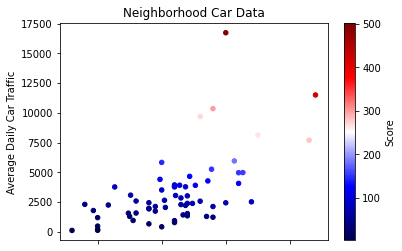

In [26]:
dotplot= mtraf.plot.scatter(x='median_speed',
                            y='average_daily_car_traffic',
                            c='Score',
                            colormap='seismic')
dotplot.set_title('Neighborhood Car Data')
dotplot.set_xlabel('Median Speed(MPH)')
dotplot.set_ylabel('Average Daily Car Traffic')
dotplot.figure()
dotplot.plot()

**INSERT RORY'S CONCLUSION HERE**

## Pittsburgh Signs By: Holden Gent

In [2]:
import pandas as pd
import geopandas
%matplotlib inline


In [3]:
df = pd.read_csv("signdata.csv")
pd.set_option('display.max_rows', None)

## want to get a df with just the signs i care about
## create query for each sign i care about and combine them
stop_query = df['description'] == 'Stop'
stop = df[stop_query]
## query of stop signs 
yield_query = df['description'] == "Yield"
yeild = df[yield_query]
## query of yeild signs
speed_query = df['description'] == "Speed Limit"
speed = df[speed_query]
## query of speed signs 
ped_query = df['description'] == "Pedestrian"
ped = df[ped_query]
## query of ped signs 
blind_ped_query = df['description'] == "Blind Pedestrian Crossing"
b_ped = df[blind_ped_query]
## query of blind ped signs 
cross_ped_query = df['description'] == "Yield to Peds in Crosswalk"
c_ped = df[cross_ped_query]
## query of crossing ped signs 

## append new DFs together to get one with just the signs we care about 
df1 = stop.append(speed)
df2 = df1.append(yeild)
df3 = df2.append(ped)
df4 = df3.append(b_ped)
df5 = df4.append(c_ped)

##sort df5 by neighborhoods
df5 = df5.sort_values('neighborhood')

df5.drop(['address_number', "street", 'mutcd_code', 'mounting_fixture',
          'date_installed', 'council_district', 'ward', 'tract', 'police_zone'
          , 'public_works_division', 'fire_zone', 'longitude', 'latitude',
          'pli_division', 'city', 'id'], axis = 1, inplace = True)

df5 = df5.groupby(['neighborhood', 'description']).value_counts()

<ipython-input-3-6d26c9be746a>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = stop.append(speed)
<ipython-input-3-6d26c9be746a>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df1.append(yeild)
<ipython-input-3-6d26c9be746a>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(ped)
<ipython-input-3-6d26c9be746a>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df3.append(b_ped)
<ipython-input-3-6d26c9be746a>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4.append(c_ped)


In [4]:
%%capture 
## want to run but not run output 
df5 = df5.to_frame(name = 'sign count')
## df5 turned into seris had to turn it back 

In [5]:
##create score col
df5['score'] = df.apply(lambda _: '', axis = 1)

In [6]:
## weight diffrent sign types per neighborhood
df5.reset_index(inplace = True)
score = []
x = df5['sign count']
i = 0
y = df5['description']
for index, row in df5.iterrows():
    if y[i] == 'Stop':
        score.append(x[i] * 1)
        i += 1
    elif y[i] == 'Speed Limit':
        score.append(x[i] * 0.5)
        i += 1
    elif y[i] == 'Pedestrian':
        score.append(x[i] * 1)
        i += 1
    elif y[i] == 'Yield':
        score.append(x[i] * 0.75)
        i += 1
    elif y[i] == 'Blind Pedestrian Crossing':
        score.append(x[i] * 2)
        i += 1
    else: ##yeild to ped 
        score.append(x[i] * 1.5)
        i += 1
df5['score'] = score

In [7]:
##get total scores by neighborhood
s_total = df5.groupby('neighborhood').sum()
s_total.drop(['sign count'], axis = 1, inplace = True)
s_total = s_total.sort_values('score', ascending = True)

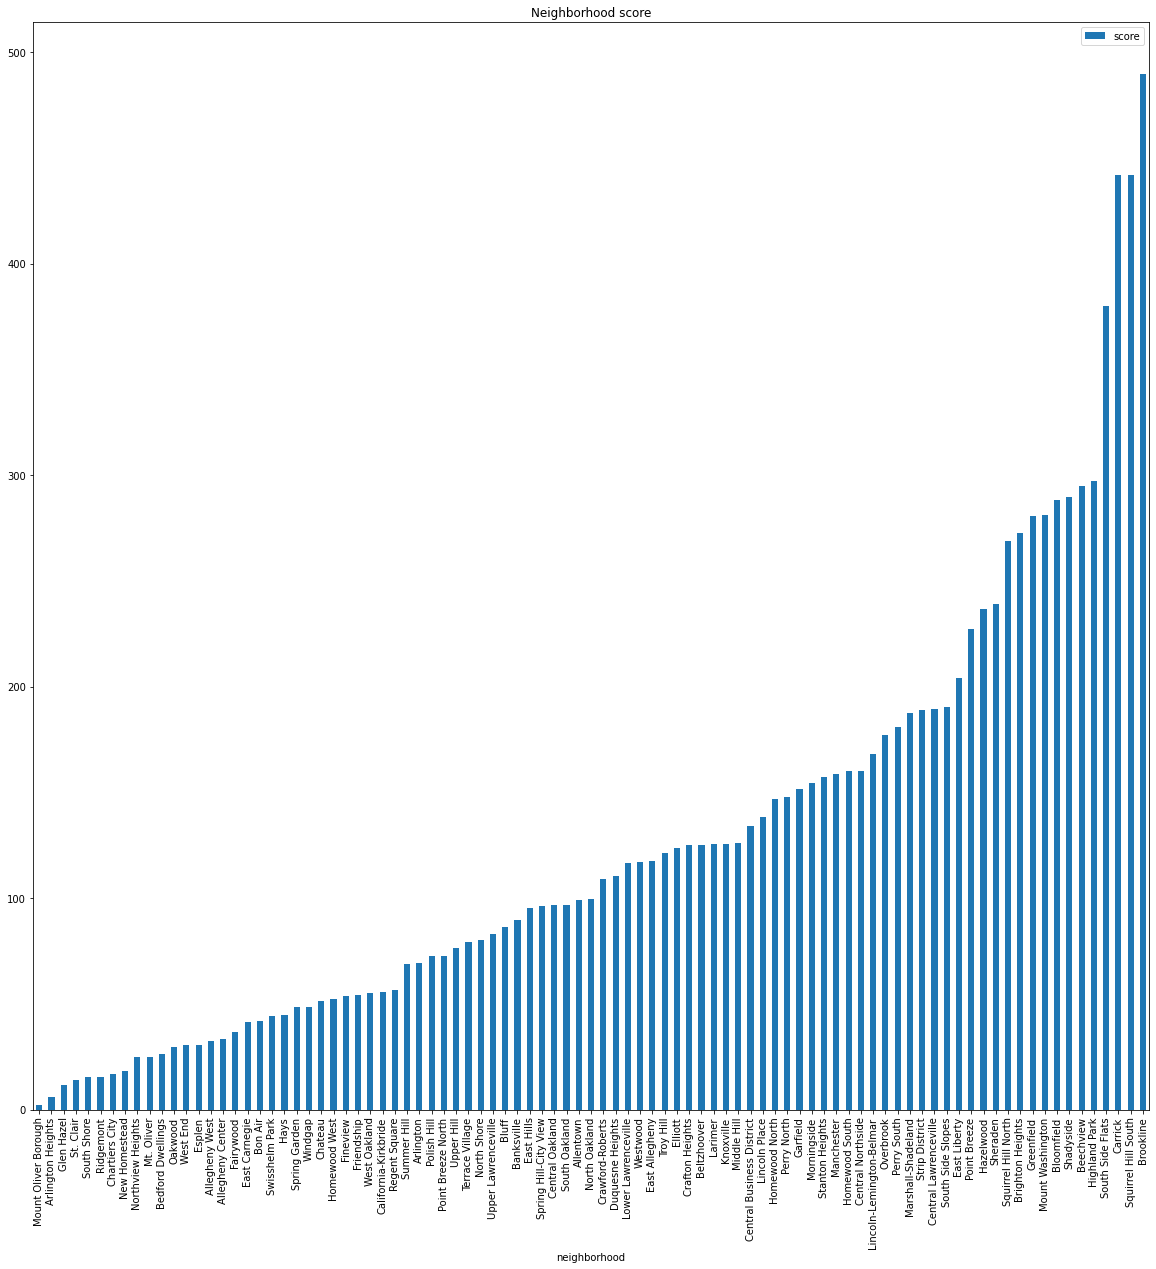

In [8]:
s_total.plot(kind = 'bar', title = 'Neighborhood score', figsize = (20,20), stacked = True)

In [11]:
s_total.unique(['neighborhood'])

AttributeError: 'DataFrame' object has no attribute 'unique'

## Conclusion 
By looking at the signs in pittsburgh data set I found that Brookline is the safest neighborhood to J-walk. I first looked at all of the sign types that the data set had and created a smaller one with just the sign types I deemed to be pedstrian friendly. I grabbed the count of each sign type in eacah neighborhood. I gave all the sign types diffrent wieghts based on how much I belived that sign would cause a driver to look out for pedstrians in the street. After applying the weight to the sign count I added the points up of each neighborhood as an overall metric to base the safest neighborhood to J-walk in. I grew up in pittsburgh but have still only been to brookline a handful of times adn have never J-walked there so i personally cannot judge this. I do belive that others are ranked correctly though, for example sq. hill south is very high on the list and this makes sense, it has lots of schools, snyogauges, residental housing and buisnesses.

## SPEED HUMP SUB METRIC BY: STEPHEN RANDALL
**Welcome to the speed hump submetric, here we will determine which neighborhood in Pittsburgh is the safest to drive/walk or bike in by looking at how many speed humps are in each neighborhood that we have data for!**

In [7]:
import pandas as sb
myHumps = sb.read_csv("speedhumps.csv")
myHumps.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


**Now we're going to concatenate our data set to only the information that is relevant. To do so we create a new dataframe that only contains the hump_id, id, Street, and neighborhood**

In [11]:
import pandas as sb
myHumps = sb.read_csv("speedhumps.csv")
myHumps.drop(['locator_address_number', 'pavement', 'speed_hump_material', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'], axis =1, inplace = True)
myHumps.head(10)

,id,hump_id,locator_street,neighborhood
0,430808404,1,Saline St,Squirrel Hill South
1,1520886592,2,Summerset Dr,Squirrel Hill South
2,858537521,3,Gold Way,North Oakland
3,297775878,4,Gold Way,North Oakland
4,1061197751,5,Gold Way,North Oakland
5,25169591,10,Saline St,Squirrel Hill South
6,2056880845,11,Jacob St,Brookline
7,1735565853,12,Jacob St,Brookline
8,857069875,13,Jacob St,Brookline
9,1822275525,14,Jacob St,Brookline


**Next we want to establish how many neighborhoods we have data for in this dataset. To do this we are going to loop through our dataset and add every new neighborhood into a String array (or list)!**

In [40]:
import pandas as sb
myHumps = sb.read_csv("speedhumps.csv")
myHumps.drop(['locator_address_number', 'pavement', 'speed_hump_material', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'], axis =1, inplace = True)
myHumps.head(10)
generalNeigh = myHumps["neighborhood"].tolist()
uniqueList = []
for x in generalNeigh:
    if x not in uniqueList:
        uniqueList.append(x)
print(uniqueList)


['Squirrel Hill South', 'North Oakland', 'Brookline', 'Bloomfield', 'Polish Hill', 'Homewood South', 'Mount Washington', 'South Side Flats', 'Central Oakland', 'Squirrel Hill North', 'Upper Hill', 'Highland Park', 'Carrick', 'Perry North', 'South Side Slopes', 'Garfield', 'Stanton Heights', 'Overbrook']


**Next we want to get the frequency of each of these neighborhoods in our data set as this will tell us how many speed bumps there are in each neighborhood!**

In [43]:
import pandas as sb
myHumps = sb.read_csv("speedhumps.csv")
myHumps.drop(['locator_address_number', 'pavement', 'speed_hump_material', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'], axis =1, inplace = True)
myHumps.head(10)
generalNeigh = myHumps["neighborhood"].tolist()
uniqueList = []
for x in generalNeigh:
    if x not in uniqueList:
        uniqueList.append(x)
print(uniqueList)
counts = myHumps["neighborhood"].value_counts()
print(counts)

['Squirrel Hill South', 'North Oakland', 'Brookline', 'Bloomfield', 'Polish Hill', 'Homewood South', 'Mount Washington', 'South Side Flats', 'Central Oakland', 'Squirrel Hill North', 'Upper Hill', 'Highland Park', 'Carrick', 'Perry North', 'South Side Slopes', 'Garfield', 'Stanton Heights', 'Overbrook']
Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Upper Hill              4
Brookline               4
Homewood South          4
South Side Slopes       4
Perry North             4
Garfield                3
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Bloomfield              3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64


**Okay great! Now we need to create a graph to model our findings!**

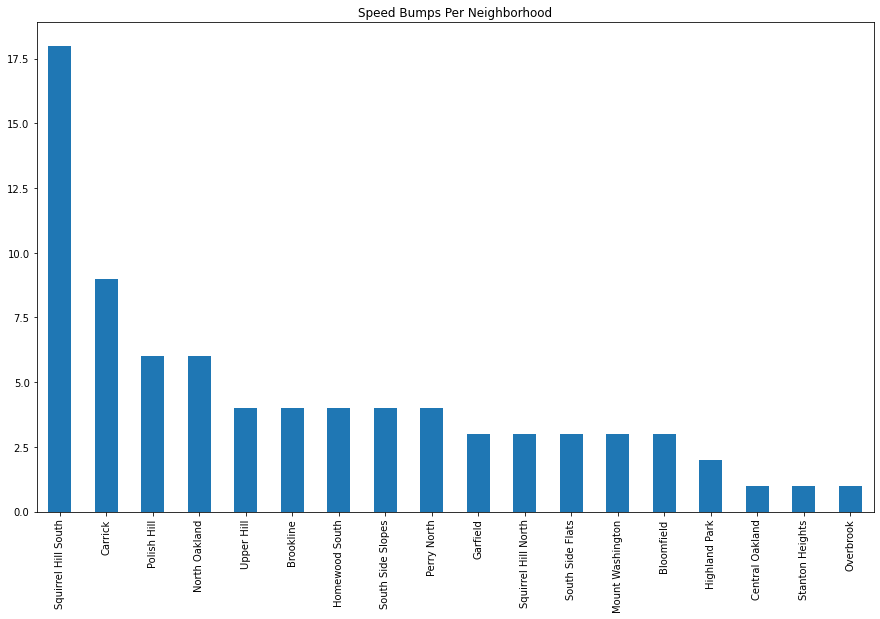

In [44]:
counts.plot.bar(title = "Speed Bumps Per Neighborhood", figsize=(15, 9), stacked = True)

## Conclusion:
**The dataset I used was the "City of Pittsburgh Speed Humps: Speed Humps" dataset from the City of Pittsburgh Speed Humps through the Western Pennsylvania Regional Public Data Center. Our group decided to choose the safest neighborhood to drive/be a pedestrian. In my case I'm making the claim that the best neighborhood to drive or be a pedestrian in is best-Squirrel Hill South. This is because it had a staggering 18 speed bumps in the neighborhood (this is staggering because of the huge drop-off between first and second place. Runner-up's were Carrick and Polish Hill/North Oakland with 9 and 6 speed bumps respectively.**

  
**In my opinion my data effectively represents which neighborhood is the best to drive and/or be a pedestrian in because speed bumps are essential ensuring that you can't overspeed. Preventing speeding is one of the most important and effective ways to ensure driver and pedestrian safety. According to the National Highway Transportation Safety Administration or NHTSA, speeding is the leading factor in over 25 percent of fatal accidents each year. By having more speed bumps it makes it harder for drivers to go for extended periods maintaining dangerous speeds.**

## Drawing Our General Conclusion!:
**First we wanted to centralize our scoring so to do this we decided to make a jaywalk coefficient score. This score will be obtained by mutiplying the score from the analysis Rory did on average daily car traffic/median speed data by 1.25 and summing it with the scores from Holden and Stephen's analysis. We decided to multiply these scores cause we viewed these two data sets to be the most important in determining the safety of a neighborhood to jaywalk in.**